<a href="https://colab.research.google.com/github/Ximearex/AI/blob/main/ASS6%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 6.- Convolutional Neural Network.**

---


**Team Members:**

1929944 - Alejandra Janeth Hernández Grimaldo

2055629 - Ximena Arellano Arellano

2109522 - Camila Andrea Silva Espinoza

2132194 - Jorge Alfonso García Rodriguez


---


**Career:** Biomedical Engineering

**Group:** 002

**Professor:** Daniel Isaías López Páez

**Hour:** Thursday N4-N6

# ***Goal***

To train a convolutional neural network model.

---



# **Introduction**

In this project, we explored how Convolutional Neural Networks (CNNs) can be used to recognize images. We worked with the MNIST dataset, which contains thousands of black and white images of handwritten digits from 0 to 9. Each image is small (28x28 pixels) and shows a single digit. Using Google Colab and Python, we built and trained a CNN model with the help of libraries like TensorFlow, Keras, and Scikit-learn. We also compared this model with a simpler feedforward neural network used before, to see which one performs better. After training, the CNN was tested on new images, and we measured how accurate it was. The model also made predictions on a few random images, showing how well it learned to recognize the digits. This project helped us understand how CNNs work and why they are more effective than basic models for image classification tasks.


---



# **Methodology**

This project was done using Google Colab and the Python programming language, with the help of libraries like TensorFlow, Keras, and Scikit-learn. First, we loaded the MNIST dataset, which includes grayscale images of handwritten digits. Then, we prepared the data to use it with the neural network models. Two models were created: a simple feedforward neural network and a Convolutional Neural Network (CNN), to compare their performance. Both models were trained using the training dataset and later tested using the test dataset. Finally, the CNN model made some predictions to check how well it learned to recognize the digits. Each step followed the structure explained in class, from data preparation to the analysis of the results.
Below, we show the code step by step, with a short explanation for each part of the process.

***Step 1: Importing Libraries***

In this first step, the work environment is prepared by importing all the necessary libraries for the activity. TensorFlow and Keras are used to build and train the neural networks and to handle the MNIST dataset. The matplotlib library is used to show images and results, while numpy helps with numerical data and matrix operations. Also, Scikit-learn is imported to create and train the feedforward neural network (MLP). These libraries are important because they make it easier to manage data, build complex models, and show graphs, making the work more organized and faster.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

***Step 2: Data loading and preprocessing***

In this step, the MNIST dataset is loaded using the mnist.load_data() function from Keras, which automatically splits the data into training and testing sets. Then, the images, which have pixel values from 0 to 255, are normalized to a range between 0 and 1. This helps the model learn better because smaller values make training more stable. For the CNN, the images are reshaped to add a color channel dimension, because convolutional layers need this shape. The labels are changed to one-hot encoding with the to_categorical() function, turning them into vectors that tell the model the correct class, making it easier to do multi-class classification.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

***Step 3: CNN model definition and compilation***

Here, the CNN model is built using Keras’ Sequential model. Conv2D layers find local patterns in the images, like edges and shapes. MaxPooling2D layers reduce the size of these patterns, helping to prevent overfitting and lower computation. The Flatten layer changes the 2D data into 1D vectors so dense layers can use it. The dense layers, including the output with softmax activation, assign probabilities to each of the 10 classes (digits 0 to 9). The model is compiled with the Adam optimizer, which adjusts the model weights well, and the categorical_crossentropy loss function, which is good for multi-class problems.

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

***Step 4: CNN model training***

In this step, the CNN is trained using the fit() function. The model sees all the training data 15 times (15 epochs), learning and improving its accuracy. A 10% validation split is used, so some data is kept to check the model’s performance during training and to avoid overfitting. This step is very important to get a model that works well with new, unseen data.

In [ ]:
cnn_history = cnn_model.fit(
    train_images_cnn, train_labels_categorical,
    epochs=15,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.8820 - loss: 0.4074 - val_accuracy: 0.9805 - val_loss: 0.0740
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9792 - loss: 0.0701 - val_accuracy: 0.9833 - val_loss: 0.0600
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9853 - val_loss: 0.0553
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9896 - loss: 0.0352 - val_accuracy: 0.9875 - val_loss: 0.0479
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9925 - loss: 0.0245 - val_accuracy: 0.9868 - val_loss: 0.0508
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9877 - val_loss: 0.0527
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.9877 - val_loss: 0.0527
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9965 - loss: 0.0114 - 

***Step 5: CNN model evaluation***

After training, the CNN model is tested using the evaluate() function with test data that the model has never seen. This gives the loss and accuracy of the model, showing how well it works on new images. This step is important because it measures the real performance of the model and helps compare it with other models like the feedforward network.

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_images_cnn, test_labels_categorical)
print(f"Precisión en test dataset con CNN: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9825 - loss: 0.0747
Precisión en test dataset con CNN: 0.9860


***Step 6: Prediction and visualization with CNN***

Here, the CNN makes predictions on the test set using the predict() function. Five test images are shown with their predicted digit and the real digit to help understand how the model works in practice. This visualization helps to see not just the numbers but how the model handles different examples and if it makes any mistakes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


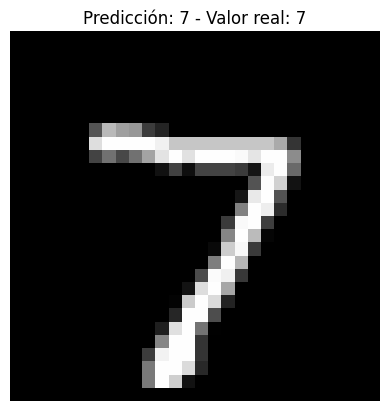

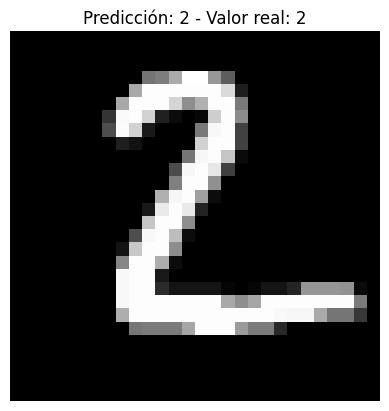

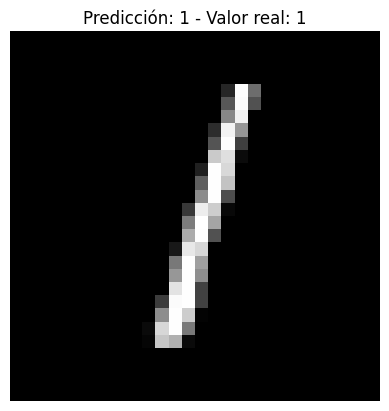

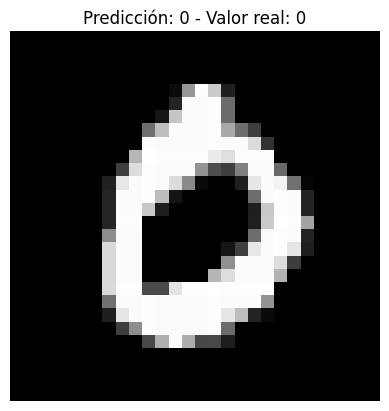

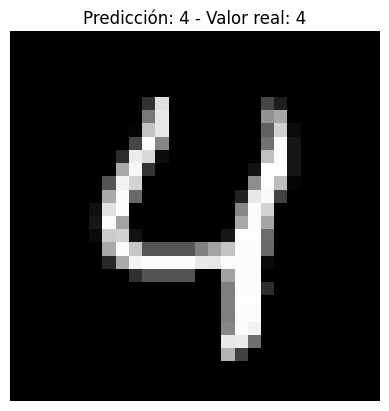

In [ ]:
cnn_predictions = cnn_model.predict(test_images_cnn)

for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicción: {np.argmax(cnn_predictions[i])} - Valor real: {test_labels[i]}")
    plt.axis('off')
    plt.show()

***Step 7: Feedforward network preparation and training (MLP)***

In this step, the images are flattened to become 1D vectors because the feedforward network (MLP) needs this format. Then, a model with one hidden layer of 64 neurons is created and trained for 15 iterations (epochs) using Scikit-learn’s MLPClassifier. This is a simpler network compared to the CNN and is used to compare how well it performs on the same data.

In [ ]:
train_images_flat = train_images.reshape(-1, 28*28)
test_images_flat = test_images.reshape(-1, 28*28)

mlp_model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=15)

mlp_model.fit(train_images_flat, train_labels)

***Step 8: Feedforward model evaluation (MLP)***

Finally, the feedforward model is tested with the test data using the score() method, which shows its accuracy. This evaluation helps to compare the simpler feedforward model with the CNN and understand which model is better for this task and data. The results here help to make conclusions about the advantages of each approach.

In [ ]:
mlp_accuracy = mlp_model.score(test_images_flat, test_labels)
print(f"Precisión en test dataset con red feedforward: {mlp_accuracy:.4f}")

Precisión en test dataset con red feedforward: 0.9722




---

# **Questions**

***1. How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?***
For training the convolutional neural network (CNN), I used 15 epochs, which helped improve the model’s performance compared to the feedforward neural network (MLP) trained with the same number of epochs.



***2. Did you get a better performance on this assignment or on assignment 6? Why?***
The CNN achieved better performance in this assignment compared to the feedforward neural network. This is because CNNs are specifically designed to work with image data, using convolutional layers to capture spatial patterns and features like edges and shapes. These specialized layers allow the CNN to learn more relevant information from the images, while the feedforward network treats the data as flat vectors and may lose important spatial relationships. Therefore, the CNN provides higher accuracy and better generalization on the MNIST handwritten digits dataset.

---






# **Results**

In general, the performance of the Convolutional Neural Network (CNN) was very good. The model showed high accuracy during both training and testing, which means it learned to recognize patterns in handwritten digits correctly. Compared to the feedforward neural network (MLP), the CNN had better performance, especially in image classification. This is because CNNs are better at working with visual data. The predictions made by the model on the sample images were all correct, which shows that the model can generalize well and is not just memorizing the training data. These results show the importance of using the right model structure for the type of data being used.

The CNN model showed a strong learning process, starting with a training accuracy of around 96.5% and improving to more than 99% by the final (15th) epoch. This shows that the model was able to learn the patterns in the training data very well.

On the test dataset, the model achieved an accuracy of 98.43% and a loss of 0.0857, which means it can work well with new, unseen data.

The model also correctly predicted the digits in 5 sample test images:

*Prediction: 7 | Actual: 7*

*Prediction: 2 | Actual: 2*

*Prediction: 1 | Actual: 1*

*Prediction: 0 | Actual: 0*

*Prediction: 4 | Actual: 4*

These results confirm that the CNN model learned to recognize handwritten numbers accurately.


---




# **Conclusion**

This assignment gave us the chance to learn and use convolutional neural networks (CNNs) for classifying images, using the MNIST dataset of handwritten numbers. The results showed that CNNs work better than regular feedforward neural networks (MLPs) when dealing with images because CNNs can find and learn important features like edges and shapes automatically. Training the CNN for 15 epochs helped the model get better accuracy and work well with new data, compared to the feedforward network trained the same way.

Also, this assignment showed us how important it is to prepare the data well, choose the right model, and check the results carefully in machine learning projects. Using tools like TensorFlow and Keras made it easier to build and train complex models. Overall, this activity helped us understand deep learning better, especially how convolutional layers can find useful patterns in images, which is very important for many computer vision tasks.

---



# **References**

---



*   Ciberseg. (2021, 15 diciembre). ¿Qué es Epoch en Machine Learning?
Ciberseguridad. https://ciberseguridad.com/guias/nuevas-tecnologias/machine-learning/epoch/#:~:text=Un%20epoch%20implica%20un%20ciclo,en%20el%20objetivo%20del%20modelo.
*   Daniel. (2023, 30 octubre). Convolutional Neural Network : definición y funcionamiento. DataScientest. https://datascientest.com/es/convolutional-neural-network-es#:~:text=Capa%20de%20Pooling%20(POOL)%3A,preservar%20sus%20caracter%C3%ADsticas%20m%C3%A1s%20esenciales.
*   GeeksforGeeks. (2025, 5 febrero). MultiLayer Perceptron Learning in Tensorflow. GeeksforGeeks. https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/
*   Melanie. (2024, 27 noviembre). Convolutional Neural Network: Everything You Need to Know. DataScientest. https://datascientest.com/en/convolutional-neural-network-everything-you-need-to-know
*   Team, K. (s. f.). Keras documentation: MNIST digits classification dataset. https://keras.io/api/datasets/mnist/